#Group 5

# **Predicting Happiness Index from Digital and Lifestyle Habits Using Machine Learning**
This project investigates how digital habits (e.g., screen time and social media usage) and lifestyle behaviors (e.g., sleep quality, exercise frequency, and stress levels) influence mental health and emotional balance. Using happiness as a measurable indicator of mental wellness, we aim to build a machine learning model that predicts a user’s happiness score based on these independent factors. The goal is to understand behavioral patterns and provide data-driven insights that can support healthier digital and lifestyle choices.”

1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

2.Load the data set

In [2]:
df=pd.read_csv('/content/Mental_Health_and_Social_Media_Balance_Dataset.csv')
df.head(8)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
5,U006,38,Male,6.6,5.0,7.0,4.0,3.0,LinkedIn,8.0
6,U007,26,Female,7.8,4.0,8.0,2.0,0.0,TikTok,7.0
7,U008,26,Female,7.4,5.0,6.0,1.0,4.0,Instagram,7.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [4]:
df.shape

(500, 10)

In [18]:
#show the unique values in the data set
df.nunique()

,0
User_ID,500
Age,34
Gender,3
Daily_Screen_Time(hrs),82
Sleep_Quality(1-10),9
Stress_Level(1-10),9
Days_Without_Social_Media,9
Exercise_Frequency(week),8
Social_Media_Platform,6
Happiness_Index(1-10),7


In [19]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [20]:
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Daily_Screen_Time(hrs),0
Sleep_Quality(1-10),0
Stress_Level(1-10),0
Days_Without_Social_Media,0
Exercise_Frequency(week),0
Social_Media_Platform,0
Happiness_Index(1-10),0


There are no null values in the data
---



In [21]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicate entries

In [6]:
print("Features in the DataFrame => {}".format(df.columns.ravel()))

Features in the DataFrame => Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')


The data set has 10 columns with 9 independant variables and one dependant one which is the Happiness_index that we are trying to predict

#3.Exploratory Data Analysis

explore each column of the dataset

Age

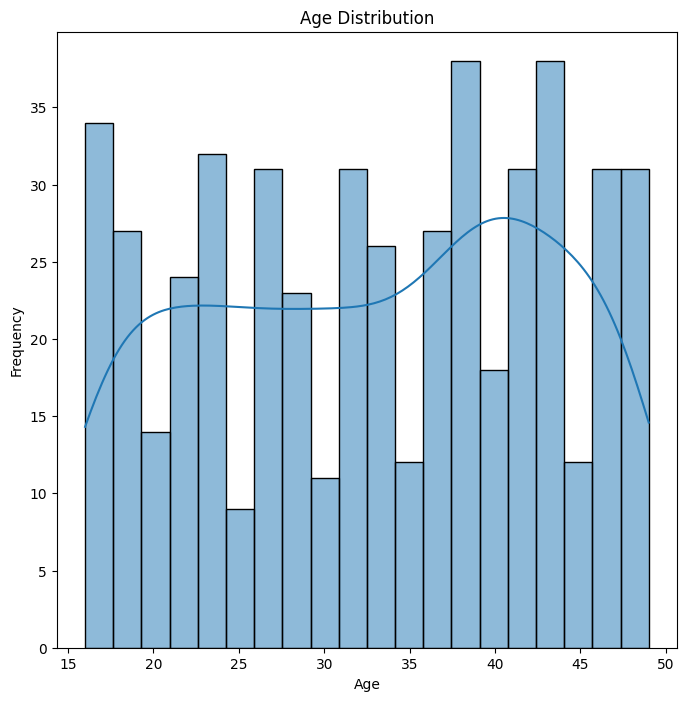

In [7]:
# explore the age distribution with histplot
plt.figure(figsize=(8,8))
sns.histplot(x='Age',data=df,bins=20,kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()



Gender

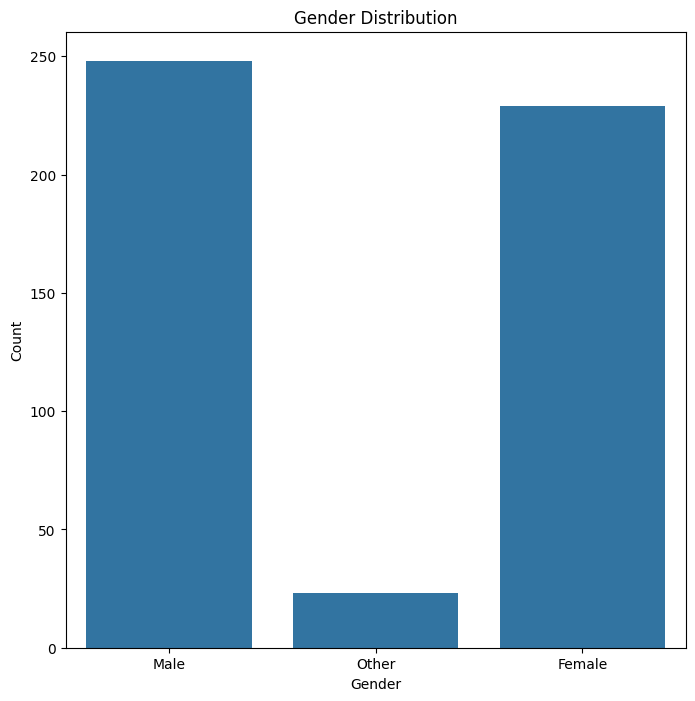

In [8]:
plt.figure(figsize=(8,8))
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


Daily screen time


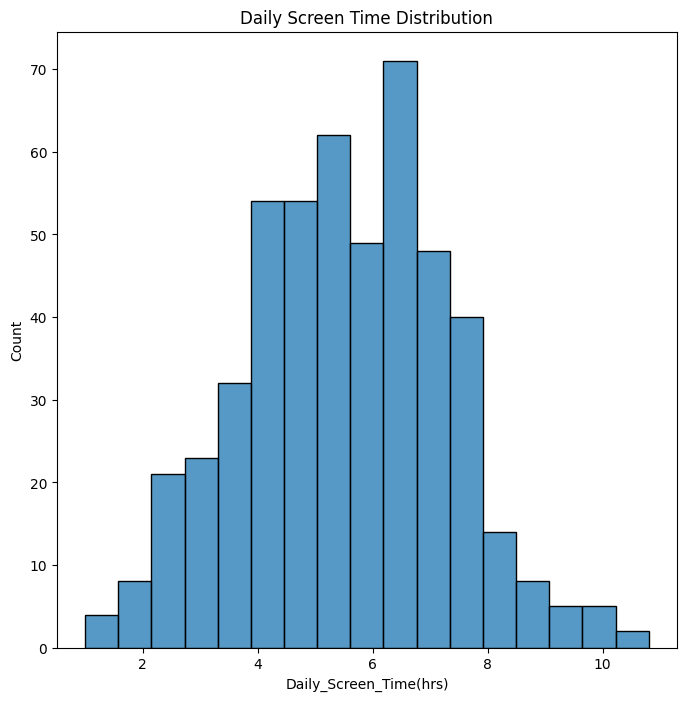

In [9]:
plt.figure(figsize=(8,8))
sns.histplot(x='Daily_Screen_Time(hrs)',data=df)
plt.title('Daily Screen Time Distribution')
plt.show()

alot of people have a screen tim of between 4 and 8 hours

sleep quality

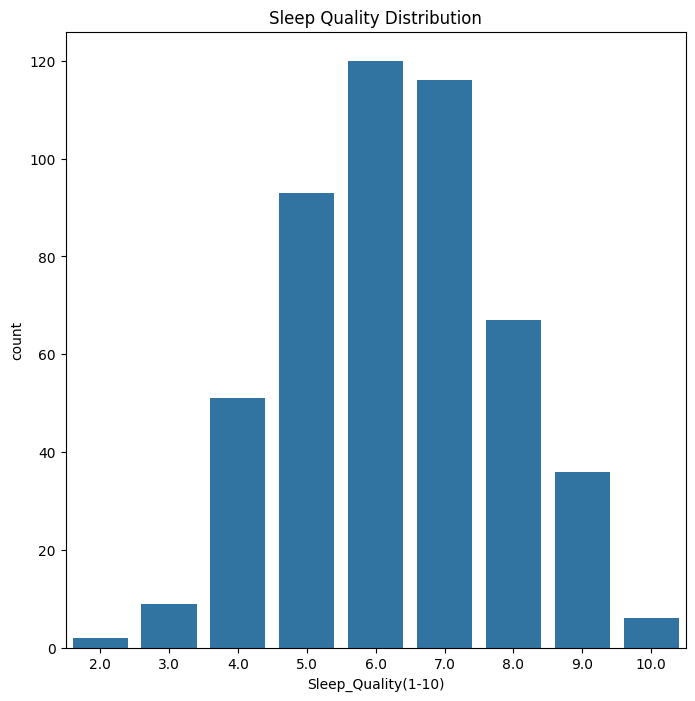

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sleep_Quality(1-10)',data=df)
plt.title('Sleep Quality Distribution')
plt.show()

Correlation between Happiness and sleep_Quality: 0.68


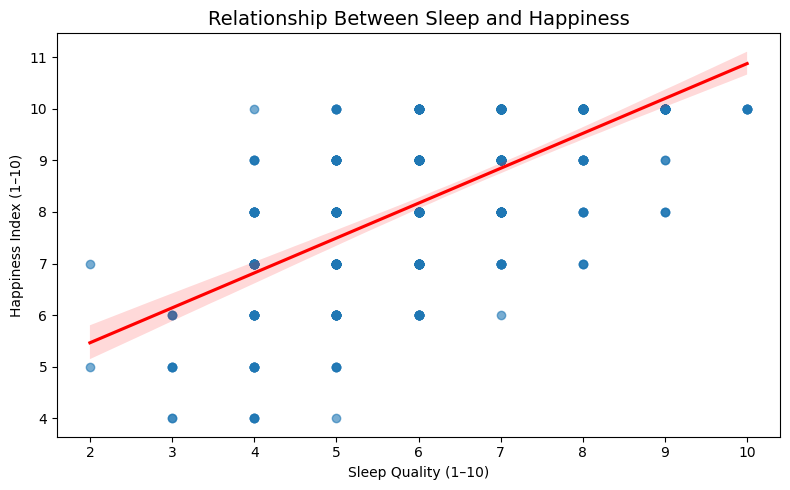

In [11]:
#correlation between sleep Quality and  happiness
correlation = df['Happiness_Index(1-10)'].corr(df['Sleep_Quality(1-10)'])
print(f"Correlation between Happiness and sleep_Quality: {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='Sleep_Quality(1-10)',
    y='Happiness_Index(1-10)',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Relationship Between Sleep and Happiness', fontsize=14)
plt.xlabel('Sleep Quality (1–10)')
plt.ylabel('Happiness Index (1–10)')
plt.tight_layout()
plt.show()

This shows a strong positive relationship between sleep quality and happiness here the better the sleep quality of an individual , the better their happiness score

stress level

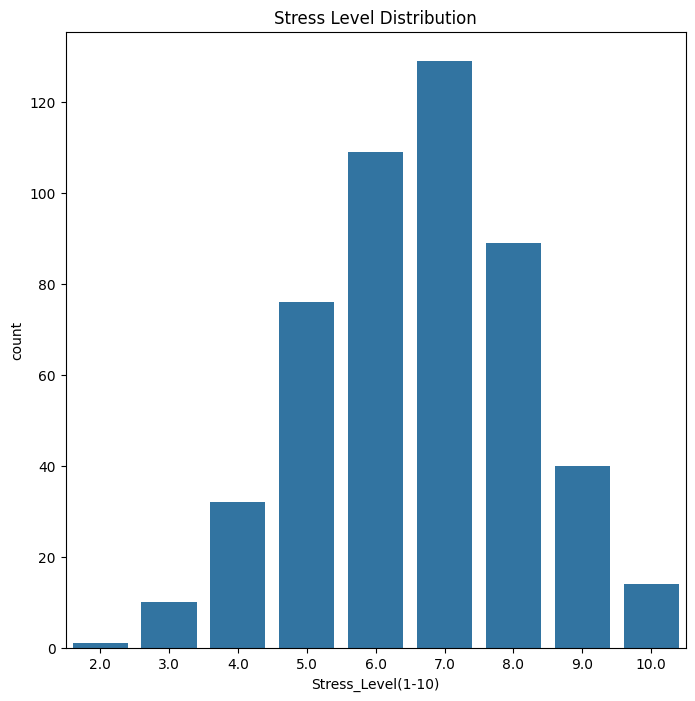

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x='Stress_Level(1-10)',data=df)
plt.title('Stress Level Distribution')
plt.show()

Alot of people have a stress level of between 5 and 8 which is concerning

Correlation between Happiness and Stress: -0.74


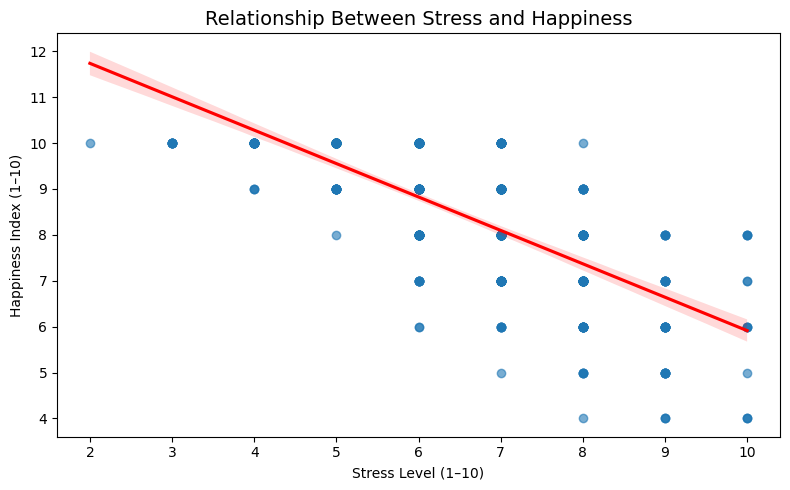

In [13]:
#correlation between stress and Happiness
correlation = df['Happiness_Index(1-10)'].corr(df['Stress_Level(1-10)'])
print(f"Correlation between Happiness and Stress: {correlation:.2f}")

plt.figure(figsize=(8,5))
sns.regplot(
    data=df,
    x='Stress_Level(1-10)',
    y='Happiness_Index(1-10)',
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Relationship Between Stress and Happiness', fontsize=14)
plt.xlabel('Stress Level (1–10)')
plt.ylabel('Happiness Index (1–10)')
plt.tight_layout()
plt.show()

we can see that there is a strong negative correlation  between happiness and stress levels. Those with a higher happiness rating also rate lower stress levels.

Days without social media

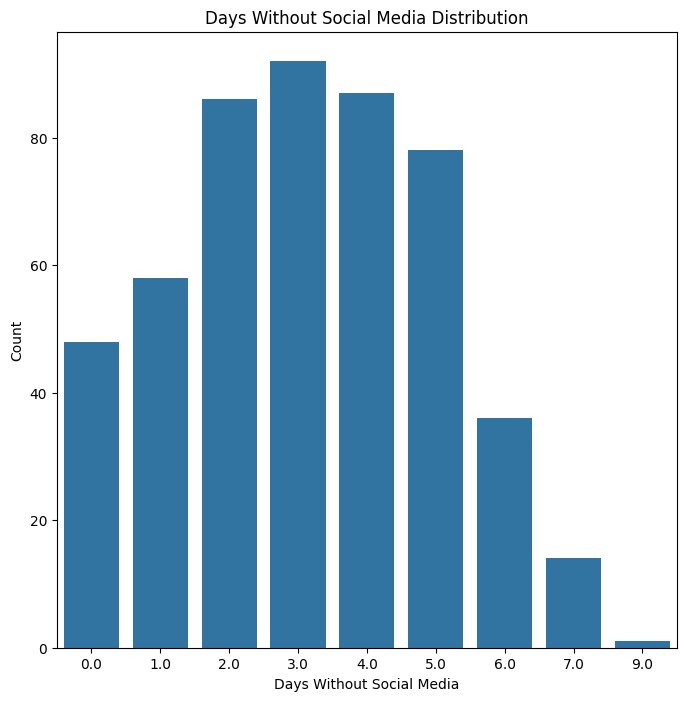

In [14]:
plt.figure(figsize=(8,8))
sns.countplot(x='Days_Without_Social_Media',data=df)
plt.xlabel('Days Without Social Media')
plt.ylabel('Count')
plt.title('Days Without Social Media Distribution')
plt.show()

Most people can handle a short break (2–5 days) .

Long breaks (a week or more) are much less common.

Almost nobody reached 9 days without social media.

Exercise frequency

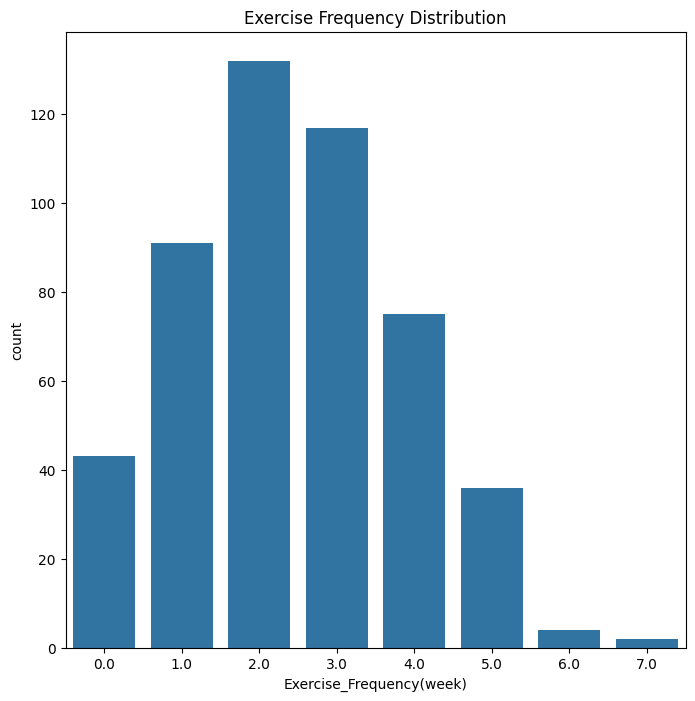

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exercise_Frequency(week)',data=df)
plt.title('Exercise Frequency Distribution')
plt.show()

Social media platform

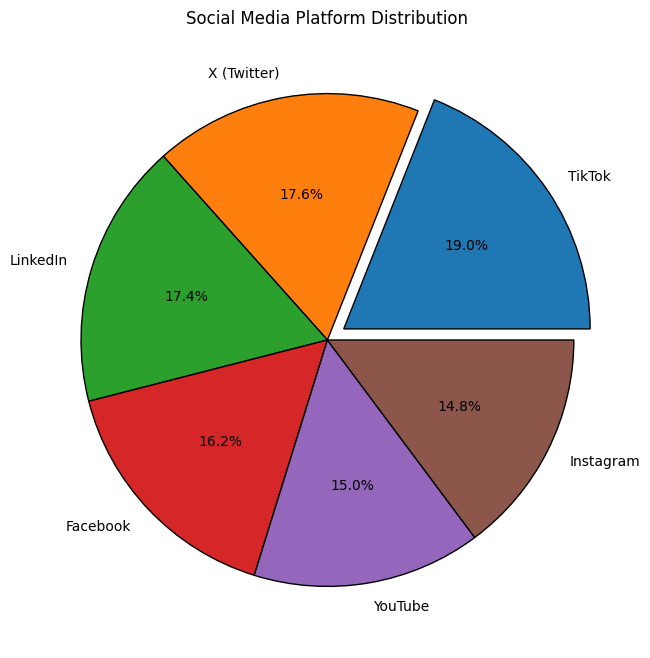

In [16]:
Platform = df['Social_Media_Platform'].value_counts()

Labels = ['TikTok','X (Twitter)','LinkedIn','Facebook','YouTube','Instagram']

plt.figure(figsize=(8,8))
plt.pie(Platform,autopct='%1.1f%%',labels=Labels,explode=(0.08,0,0,0,0,0),wedgeprops={'edgecolor':"black"})
plt.title('Social Media Platform Distribution')
plt.show()


tiktok is the most used social media app followed by twitter

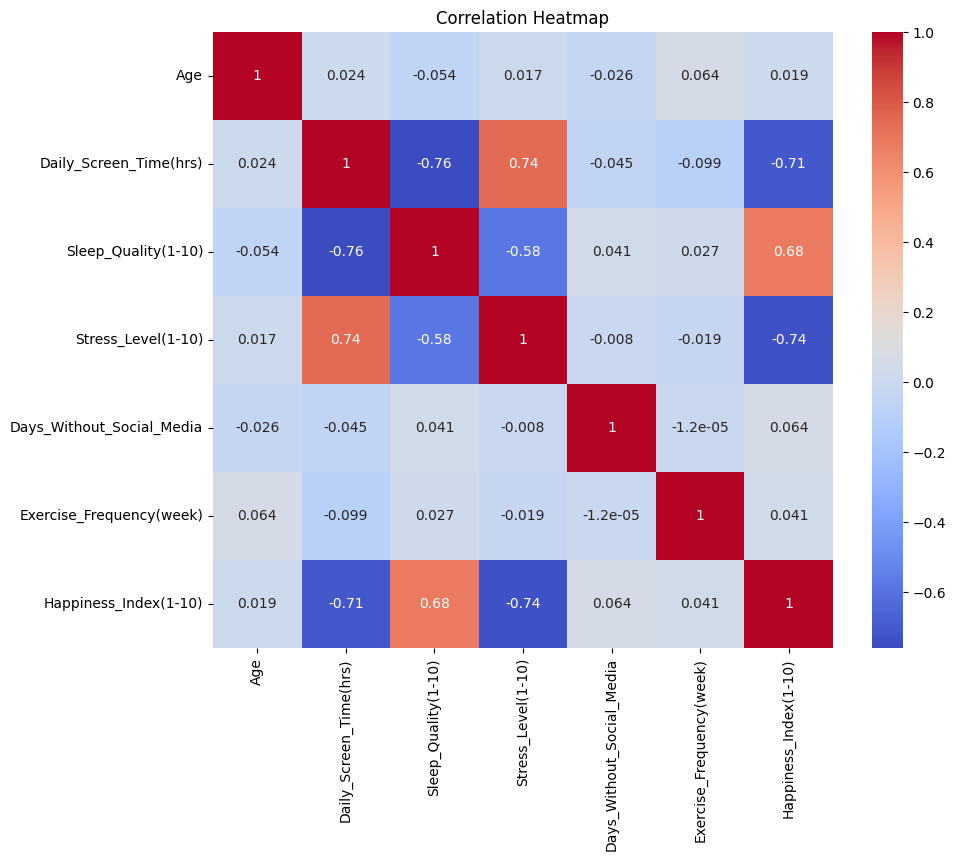

In [17]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**From the Correlation Heat map we can see that:**



*   Higher stress levels bring about lower happiness since the relationship is strongly negative(-0.74)
*   Higher screen time leads to lower happiness


*   Better sleep = higher happiness
*   Very weak relationship between age and happiness

*   Very weak relationship between exercise frequency and happiness almost no effect.(0.041)

*   Very weak positive relationship between days without social media and happiness









## ***Stress level, screen time, and sleep quality are the most important predictors of happiness.***


